<a href="https://colab.research.google.com/github/ShrieVarshini2004/Understanding-SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
file_path = "/content/drive/My Drive/cell_samples.csv"
df = pd.read_csv(file_path)
print(df.head())  # Display first few rows

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


**Dataset Preview:**
* Displays the first few rows of the dataset to check if it's loaded correctly.
* Shows columns like Clump, UnifSize, UnifShape, BareNuc, and Class.

**Scatter Plot:**

Visualizes benign (yellow) and malignant (dark blue) tumor samples based on Clump vs. UnifSize.
Helps understand how these features are distributed for different classes.
Data Preprocessing

**Output:**

Ensures BareNuc is converted to integers.
Shows column data types before and after conversion.


**Train-Test Split:**
Training set size: (Number of samples, Number of features) → (≈80% of data).
Test set size: (≈20% of data).

**SVM Model Predictions:**
Outputs the first few predicted labels.

**Confusion Matrix:**

*   Shows how many benign/malignant cases were classified correctly or incorrectly.
*   Helps analyze the model’s misclassifications.


**Classification Report:**
Precision, Recall, F1-score for each class (Benign = 2, Malignant = 4).
Higher values indicate better performance.

**F1-score:**
A weighted score that considers both precision and recall.
Higher F1-score → Better model performance.

**Jaccard Score:**
Measures similarity between predicted and actual labels.
Higher Jaccard score → More accurate predictions.

**Final Conclusion:**
The SVM model successfully classifies tumors as benign or malignant with good accuracy, based on evaluation metrics like confusion matrix, F1-score, and Jaccard index. 🚀

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


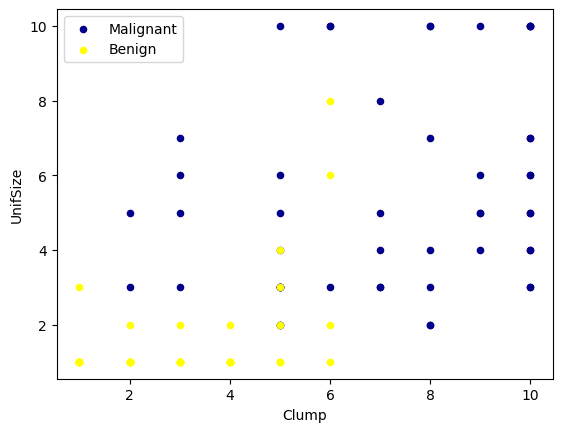

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object
Train set: (546, 9) (546,)
Test set: (137, 9) (137,)
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]
F1-score: 0.9639038982104676
Jaccard Score: 0.9038461538461539


<ipython-input-5-e50a3fc16e2a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)


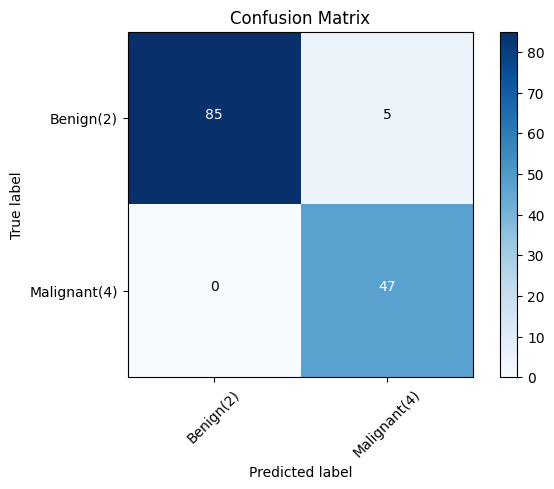

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
import itertools
from sklearn import svm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Correct file path
file_path = "/content/drive/My Drive/cell_samples.csv"

# Load the dataset
cell_df = pd.read_csv(file_path)  # Corrected filename
print(cell_df.head())  # Display first few rows to check data

# Plot scatter plot
ax = cell_df[cell_df['Class'] == 4][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='Malignant')
cell_df[cell_df['Class'] == 2][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='Benign', ax=ax)
plt.show()

# Check data types
print(cell_df.dtypes)

# Convert 'BareNuc' to numeric, drop NaNs
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Features and labels
feature_cols = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
                'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
feature_df = cell_df[feature_cols]

X = np.asarray(feature_df)
y = np.asarray(cell_df['Class'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Train SVM model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# Confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2, 4])
np.set_printoptions(precision=2)

# Print classification report
print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title='Confusion Matrix')

# Calculate F1-score
f1 = f1_score(y_test, yhat, average='weighted')
print("F1-score:", f1)

# Calculate Jaccard score
jaccard = jaccard_score(y_test, yhat, pos_label=4)  # Adjust pos_label if needed
print("Jaccard Score:", jaccard)


Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]
F1-score (Linear Kernel): 0.9639038982104676
Jaccard Score (Linear Kernel): 0.9038461538461539


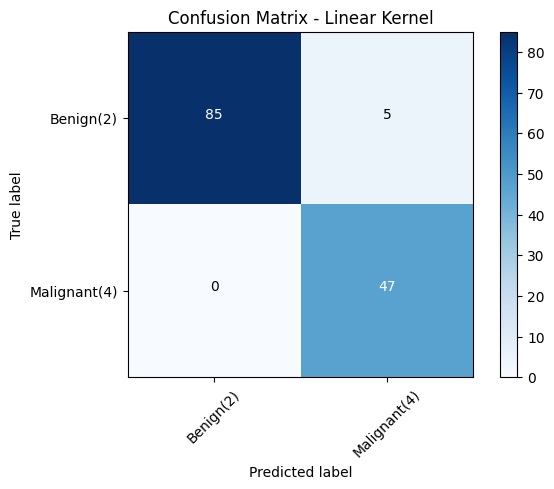

In [6]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Train SVM Model with Linear Kernel
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
yhat_linear = clf_linear.predict(X_test)

# Compute Confusion Matrix
cnf_matrix_linear = confusion_matrix(y_test, yhat_linear, labels=[2, 4])
np.set_printoptions(precision=2)

# Print Classification Report
print("Classification Report for Linear Kernel:")
print(classification_report(y_test, yhat_linear))

# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cnf_matrix_linear, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title='Confusion Matrix - Linear Kernel')

# Compute F1-score
f1_linear = f1_score(y_test, yhat_linear, average='weighted')
print("F1-score (Linear Kernel):", f1_linear)

# Compute Jaccard Score
jaccard_linear = jaccard_score(y_test, yhat_linear, pos_label=4)
print("Jaccard Score (Linear Kernel):", jaccard_linear)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔹 Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137


🔹 Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



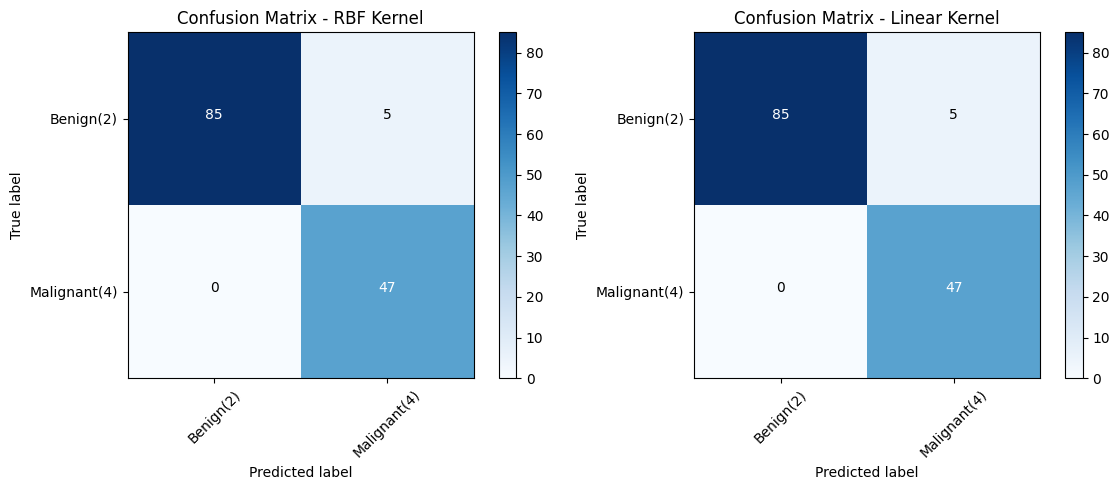

🔹 **F1-score (RBF Kernel)**: 0.9639
🔹 **F1-score (Linear Kernel)**: 0.9639
🔹 **Jaccard Score (RBF Kernel)**: 0.9038
🔹 **Jaccard Score (Linear Kernel)**: 0.9038


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = "/content/drive/My Drive/cell_samples.csv"
cell_df = pd.read_csv(file_path)

# Preprocessing
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Define features and labels
feature_cols = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
                'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
X = np.asarray(cell_df[feature_cols])
y = np.asarray(cell_df['Class'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Train and evaluate SVM with RBF Kernel
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
yhat_rbf = clf_rbf.predict(X_test)

# Train and evaluate SVM with Linear Kernel
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
yhat_linear = clf_linear.predict(X_test)

# Compute confusion matrices
cnf_matrix_rbf = confusion_matrix(y_test, yhat_rbf, labels=[2, 4])
cnf_matrix_linear = confusion_matrix(y_test, yhat_linear, labels=[2, 4])

# Print classification reports
print("🔹 Classification Report (RBF Kernel):")
print(classification_report(y_test, yhat_rbf))

print("\n🔹 Classification Report (Linear Kernel):")
print(classification_report(y_test, yhat_linear))

# Plot confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix_rbf, classes=['Benign(2)', 'Malignant(4)'], title='Confusion Matrix - RBF Kernel')

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix_linear, classes=['Benign(2)', 'Malignant(4)'], title='Confusion Matrix - Linear Kernel')

plt.show()

# Compute F1-scores and Jaccard Scores
f1_rbf = f1_score(y_test, yhat_rbf, average='weighted')
f1_linear = f1_score(y_test, yhat_linear, average='weighted')

jaccard_rbf = jaccard_score(y_test, yhat_rbf, pos_label=4)
jaccard_linear = jaccard_score(y_test, yhat_linear, pos_label=4)

# Print comparison of evaluation metrics
print(f"🔹 **F1-score (RBF Kernel)**: {f1_rbf:.4f}")
print(f"🔹 **F1-score (Linear Kernel)**: {f1_linear:.4f}")
print(f"🔹 **Jaccard Score (RBF Kernel)**: {jaccard_rbf:.4f}")
print(f"🔹 **Jaccard Score (Linear Kernel)**: {jaccard_linear:.4f}")


In [8]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train)
yhat_sigmoid = clf_sigmoid.predict(X_test)

print("🔹 Classification Report (Sigmoid Kernel):")
print(classification_report(y_test, yhat_sigmoid))

f1_sigmoid = f1_score(y_test, yhat_sigmoid, average='weighted')
jaccard_sigmoid = jaccard_score(y_test, yhat_sigmoid, pos_label=4)

print(f"🔹 **F1-score (Sigmoid Kernel)**: {f1_sigmoid:.4f}")
print(f"🔹 **Jaccard Score (Sigmoid Kernel)**: {jaccard_sigmoid:.4f}")


🔹 Classification Report (Sigmoid Kernel):
              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

🔹 **F1-score (Sigmoid Kernel)**: 0.3715
🔹 **Jaccard Score (Sigmoid Kernel)**: 0.0000


In [9]:
clf_poly = svm.SVC(kernel='poly', degree=3)  # Using a 3rd-degree polynomial
clf_poly.fit(X_train, y_train)
yhat_poly = clf_poly.predict(X_test)

print("🔹 Classification Report (Polynomial Kernel):")
print(classification_report(y_test, yhat_poly))

f1_poly = f1_score(y_test, yhat_poly, average='weighted')
jaccard_poly = jaccard_score(y_test, yhat_poly, pos_label=4)

print(f"🔹 **F1-score (Polynomial Kernel)**: {f1_poly:.4f}")
print(f"🔹 **Jaccard Score (Polynomial Kernel)**: {jaccard_poly:.4f}")


🔹 Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

🔹 **F1-score (Polynomial Kernel)**: 0.9711
🔹 **Jaccard Score (Polynomial Kernel)**: 0.9216


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔹 Training & Evaluating Linear Kernel...
🔹 Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137


🔹 Training & Evaluating RBF Kernel...
🔹 Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137


🔹 Training & Evaluating Polynomial Kernel...
🔹 Classific

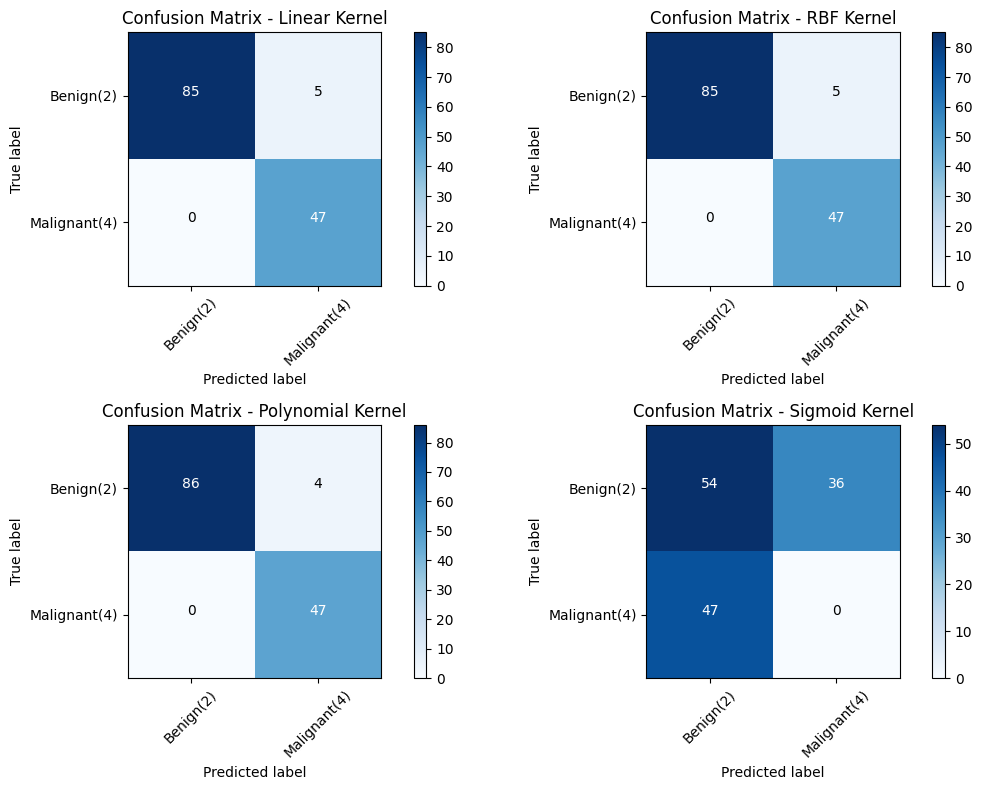


🔹 **Final Model Comparison:**
Kernel       F1-score     Jaccard Score
Linear       0.9639       0.9038      
RBF          0.9639       0.9038      
Polynomial   0.9711       0.9216      
Sigmoid      0.3715       0.0000      


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = "/content/drive/My Drive/cell_samples.csv"
cell_df = pd.read_csv(file_path)

# Preprocessing
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Define features and labels
feature_cols = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
                'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
X = np.asarray(cell_df[feature_cols])
y = np.asarray(cell_df['Class'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define different kernels
kernels = {
    'Linear': svm.SVC(kernel='linear'),
    'RBF': svm.SVC(kernel='rbf'),
    'Polynomial': svm.SVC(kernel='poly', degree=3),  # Degree 3 polynomial
    'Sigmoid': svm.SVC(kernel='sigmoid')
}

# Dictionary to store results
results = {}

# Train and evaluate each kernel
for name, clf in kernels.items():
    print(f"\n🔹 Training & Evaluating {name} Kernel...")

    # Train model
    clf.fit(X_train, y_train)

    # Predict
    yhat = clf.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[2, 4])

    # Compute F1-score and Jaccard Score
    f1 = f1_score(y_test, yhat, average='weighted')
    jaccard = jaccard_score(y_test, yhat, pos_label=4)

    # Store results
    results[name] = {
        "Model": clf,
        "Predictions": yhat,
        "Confusion Matrix": cnf_matrix,
        "F1-score": f1,
        "Jaccard Score": jaccard
    }

    # Print classification report
    print(f"🔹 Classification Report ({name} Kernel):")
    print(classification_report(y_test, yhat))

# Plot all confusion matrices side by side
plt.figure(figsize=(12, 8))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plot_confusion_matrix(res["Confusion Matrix"], classes=['Benign(2)', 'Malignant(4)'], title=f'Confusion Matrix - {name} Kernel')

plt.show()

# Print final comparison of all kernels
print("\n🔹 **Final Model Comparison:**")
print(f"{'Kernel':<12} {'F1-score':<12} {'Jaccard Score':<12}")
print("=" * 36)
for name, res in results.items():
    print(f"{name:<12} {res['F1-score']:<12.4f} {res['Jaccard Score']:<12.4f}")
